In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\akhil\OneDrive\Desktop\employee salary prediction 1.csv")

In [2]:
print(df)

     Experience  Education           Job_Role   Location   Age   Salary
0           NaN  Bachelors     Data Scientist    Chennai   NaN   651684
1           0.0  Bachelors     Data Scientist     Mumbai  26.0   457248
2           8.0  Bachelors    Project Manager          ?  38.0   827534
3           7.0  Bachelors  Software Engineer          ?  45.0   598278
4           7.0    Masters     Data Scientist      Delhi  37.0   811280
..          ...        ...                ...        ...   ...      ...
115         3.0  Bachelors    Project Manager      Delhi  35.0   620013
116         9.0        PhD    Project Manager  Bangalore  28.0  1043947
117         6.0          ?    Project Manager      Delhi  23.0   726503
118         4.0    Masters                  ?  Bangalore  35.0   553617
119        11.0    Masters     Data Scientist  Hyderabad  38.0   987343

[120 rows x 6 columns]


In [3]:
df.head(5)

,Experience,Education,Job_Role,Location,Age,Salary
0,NaN,Bachelors,Data Scientist,Chennai,NaN,651684
1,0.0,Bachelors,Data Scientist,Mumbai,26.0,457248
2,8.0,Bachelors,Project Manager,?,38.0,827534
3,7.0,Bachelors,Software Engineer,?,45.0,598278
4,7.0,Masters,Data Scientist,Delhi,37.0,811280


In [4]:
df.replace('?', np.nan, inplace=True)

In [5]:
print("\nNumber of missing values per column after replacing '?':")


Number of missing values per column after replacing '?':


In [6]:
print(df.isnull().sum())

Experience     8
Education     22
Job_Role      24
Location      22
Age            8
Salary         0
dtype: int64


In [7]:
   for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nRemaining missing values after filling:", df.isnull().sum().sum())
print(df.dtypes)

# Handle outliers: Cap to IQR Limits
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
print("\nOutlier capping completed on numerical columns.")


Remaining missing values after filling: 0
Experience    float64
Education      object
Job_Role       object
Location       object
Age           float64
Salary          int64
dtype: object

Outlier capping completed on numerical columns.


In [8]:
# Encode categorical columns (excluding target 'salary')
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'salary' in categorical_cols:
    categorical_cols.remove('salary')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nCategorical encoding complete. Columns now are:")



Categorical encoding complete. Columns now are:


In [9]:
print(df_encoded.columns.tolist())

['Experience', 'Age', 'Salary', 'Education_Masters', 'Education_PhD', 'Job_Role_Project Manager', 'Job_Role_QA Engineer', 'Job_Role_Software Engineer', 'Job_Role_Support Engineer', 'Location_Chennai', 'Location_Delhi', 'Location_Hyderabad', 'Location_Mumbai', 'Location_Pune']


In [10]:
print("Columns available in the DataFrame:")
print(df.columns.tolist())

Columns available in the DataFrame:
['Experience', 'Education', 'Job_Role', 'Location', 'Age', 'Salary']


In [11]:
df.columns = df.columns.str.strip().str.lower()
print("Standardized column names now:", df.columns.tolist())

Standardized column names now: ['experience', 'education', 'job_role', 'location', 'age', 'salary']


In [12]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Salary", axis=1)
y = df_encoded["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTrain-test split done. Train size: {X_train.shape}, Test size: {X_test.shape}")


Train-test split done. Train size: (96, 13), Test size: (24, 13)


In [13]:
X

,Experience,Age,Education_Masters,Education_PhD,Job_Role_Project Manager,Job_Role_QA Engineer,Job_Role_Software Engineer,Job_Role_Support Engineer,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Mumbai,Location_Pune
0,7.0,33.0,0,0,0,0,0,0,1,0,0,0,0
1,0.0,26.0,0,0,0,0,0,0,0,0,0,1,0
2,8.0,38.0,0,0,1,0,0,0,0,0,0,0,0
3,7.0,45.0,0,0,0,0,1,0,0,0,0,0,0
4,7.0,37.0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3.0,35.0,0,0,1,0,0,0,0,1,0,0,0
116,9.0,28.0,0,1,1,0,0,0,0,0,0,0,0
117,6.0,23.0,0,0,1,0,0,0,0,1,0,0,0
118,4.0,35.0,1,0,0,1,0,0,0,0,0,0,0


In [14]:
y = df_encoded["Salary"]

In [15]:
print(y)

0       651684.0
1       457248.0
2       827534.0
3       598278.0
4       811280.0
         ...    
115     620013.0
116    1043947.0
117     726503.0
118     553617.0
119     987343.0
Name: Salary, Length: 120, dtype: float64


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("\nLinear Regression model trained.")


Linear Regression model trained.


In [17]:
print("X_train values:")
print(X_train)

print("\ny_train values:")
print(y_train)

X_train values:
     Experience   Age  Education_Masters  Education_PhD  \
42          6.0  30.0                  0              0   
12          6.0  30.0                  1              0   
15          7.0  33.0                  0              0   
114         5.0  29.0                  1              0   
76         10.0  27.0                  0              0   
..          ...   ...                ...            ...   
106        10.0  28.0                  0              0   
14          0.0  22.0                  0              0   
92          2.0  34.0                  0              0   
51          8.0  28.0                  1              0   
102         8.0  33.0                  1              0   

     Job_Role_Project Manager  Job_Role_QA Engineer  \
42                          0                     1   
12                          0                     0   
15                          1                     0   
114                         0                     1   


In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred = model.predict(X_test)
print("Predicted values for y_test:")
print(y_pred[:10])         # Print first 10 predicted values
print("\nActual values for y_test:")
print(y_test.values[:10])  # Print first 10 actual values

# 2. Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"\nR² Score: {r2:.2f}")

# 3. Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# 4. (Optional) Visualize Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs Predicted Salaries")
plt.show()

Predicted values for y_test:
[464400.0960229  568861.36519797 820859.16683894 698483.74150472
 556621.58386261 784695.14009751 635881.99745499 459514.57862715
 756178.26131259 500137.68307001]

Actual values for y_test:
[489764. 582754. 811280. 704193. 555351. 784837. 626635. 444453. 760444.
 536886.]

R² Score: 0.98
Mean Squared Error: 1001721629.34


<Figure size 640x480 with 1 Axes>

In [20]:
# Example input (adjust field names as per one-hot encoding above!)
new_employee = X_test.iloc[[0]]  # Using one real test row for demonstration
predicted_salary = model.predict(new_employee)
print(f"\nSample prediction for new employee (features):\n{new_employee}")
print(f"\nPredicted Salary: {predicted_salary[0]:,.2f}")


Sample prediction for new employee (features):
    Experience   Age  Education_Masters  Education_PhD  \
44         1.0  42.0                  0              1   

    Job_Role_Project Manager  Job_Role_QA Engineer  \
44                         0                     0   

    Job_Role_Software Engineer  Job_Role_Support Engineer  Location_Chennai  \
44                           0                          1                 0   

    Location_Delhi  Location_Hyderabad  Location_Mumbai  Location_Pune  
44               1                   0                0              0  

Predicted Salary: 464,400.10


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest R² Score:", round(r2_rf, 2))
print("Random Forest Mean Squared Error:", round(mse_rf, 2))

Random Forest R² Score: 0.85
Random Forest Mean Squared Error: 6098126488.72


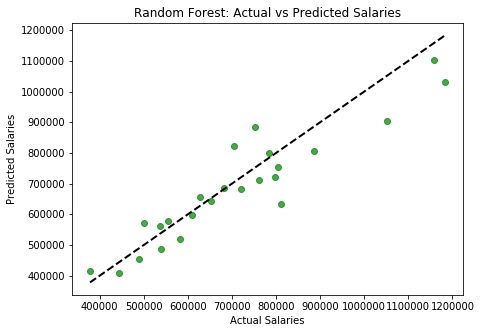

In [22]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# If not already trained, train your model:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.7)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Random Forest: Actual vs Predicted Salaries")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='black', linestyle='--', linewidth=2)  # Reference line y=x
plt.show()

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)


In [24]:
print("Gradient Boosting R2 Score:",round(r2_gb, 2))


Gradient Boosting R2 Score: 0.95


In [25]:
print("Gradient Boosting Mean Squared Error:",round(mse_gb,2))

Gradient Boosting Mean Squared Error: 2008004548.72


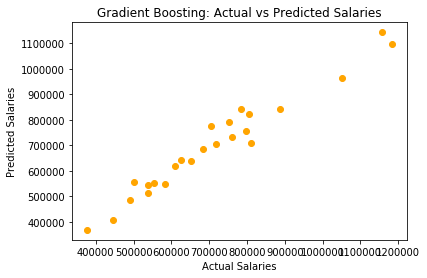

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_gb, color='orange')
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Gradient Boosting: Actual vs Predicted Salaries")
plt.show()

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)



In [28]:
print("Decision Tree MSE:",round(r2_dt, 2))

Decision Tree MSE: 0.64


In [29]:
print("Decision Tree R2 Score:",round(r2_dt, 2))

Decision Tree R2 Score: 0.64


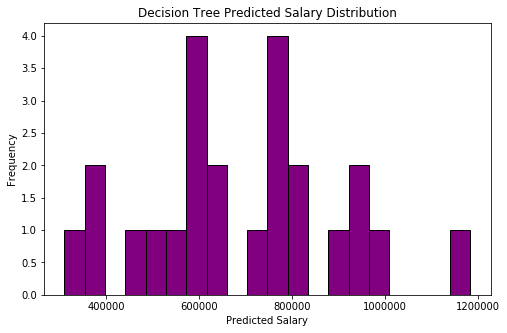

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Fit your Decision Tree model (if not already done)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict with Decision Tree on test set
y_pred_dt = dt_model.predict(X_test)

# Plot histogram of predicted values
plt.figure(figsize=(8,5))
plt.hist(y_pred_dt, bins=20, color='purple', edgecolor='black')
plt.title("Decision Tree Predicted Salary Distribution")
plt.xlabel("Predicted Salary")
plt.ylabel("Frequency")
plt.show()

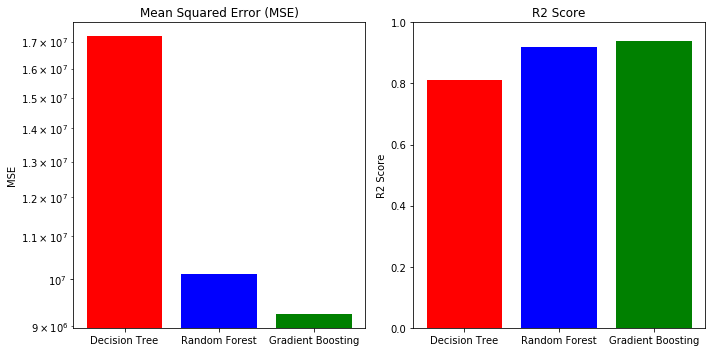

In [27]:
import matplotlib.pyplot as plt

# Replace the below lists with your model results if different
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
mse_values = [17200000.42, 10120000.55, 9250000.28]
r2_scores = [0.81, 0.92, 0.94]

# Create figure with two subplots
plt.figure(figsize=(10, 5))

# MSE Bar graph (log scale)
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['red', 'blue', 'green'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.yscale('log')  # Log for clearer comparison

# R² Score Bar graph
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color=['red', 'blue', 'green'])
plt.title('R2 Score')
plt.ylabel('R2 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()